# Diamond Data Set

## Features
* price price in US dollars (\$326--\$18,823)
* carat weight of the diamond (0.2--5.01)
* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color diamond color, from J (worst) to D (best)
* clarity a measurement of how clear the diamond is (I1 (worst), SI2,
SI1, VS2, VS1, VVS2, VVS1, IF (best))
* x length in mm (0--10.74)
* y width in mm (0--58.9)
* z depth in mm (0--31.8)
* depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* table width of top of diamond relative to widest point (43--95)

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Data Loading and Overview

In [2]:
df = pd.read_csv(r"C:\Users\kalag\Downloads\diamonds.csv")

In [3]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Remove unknown column

In [4]:
df.drop(columns = 'Unnamed: 0',inplace = True)

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#  Data Cleaning

<Axes: >

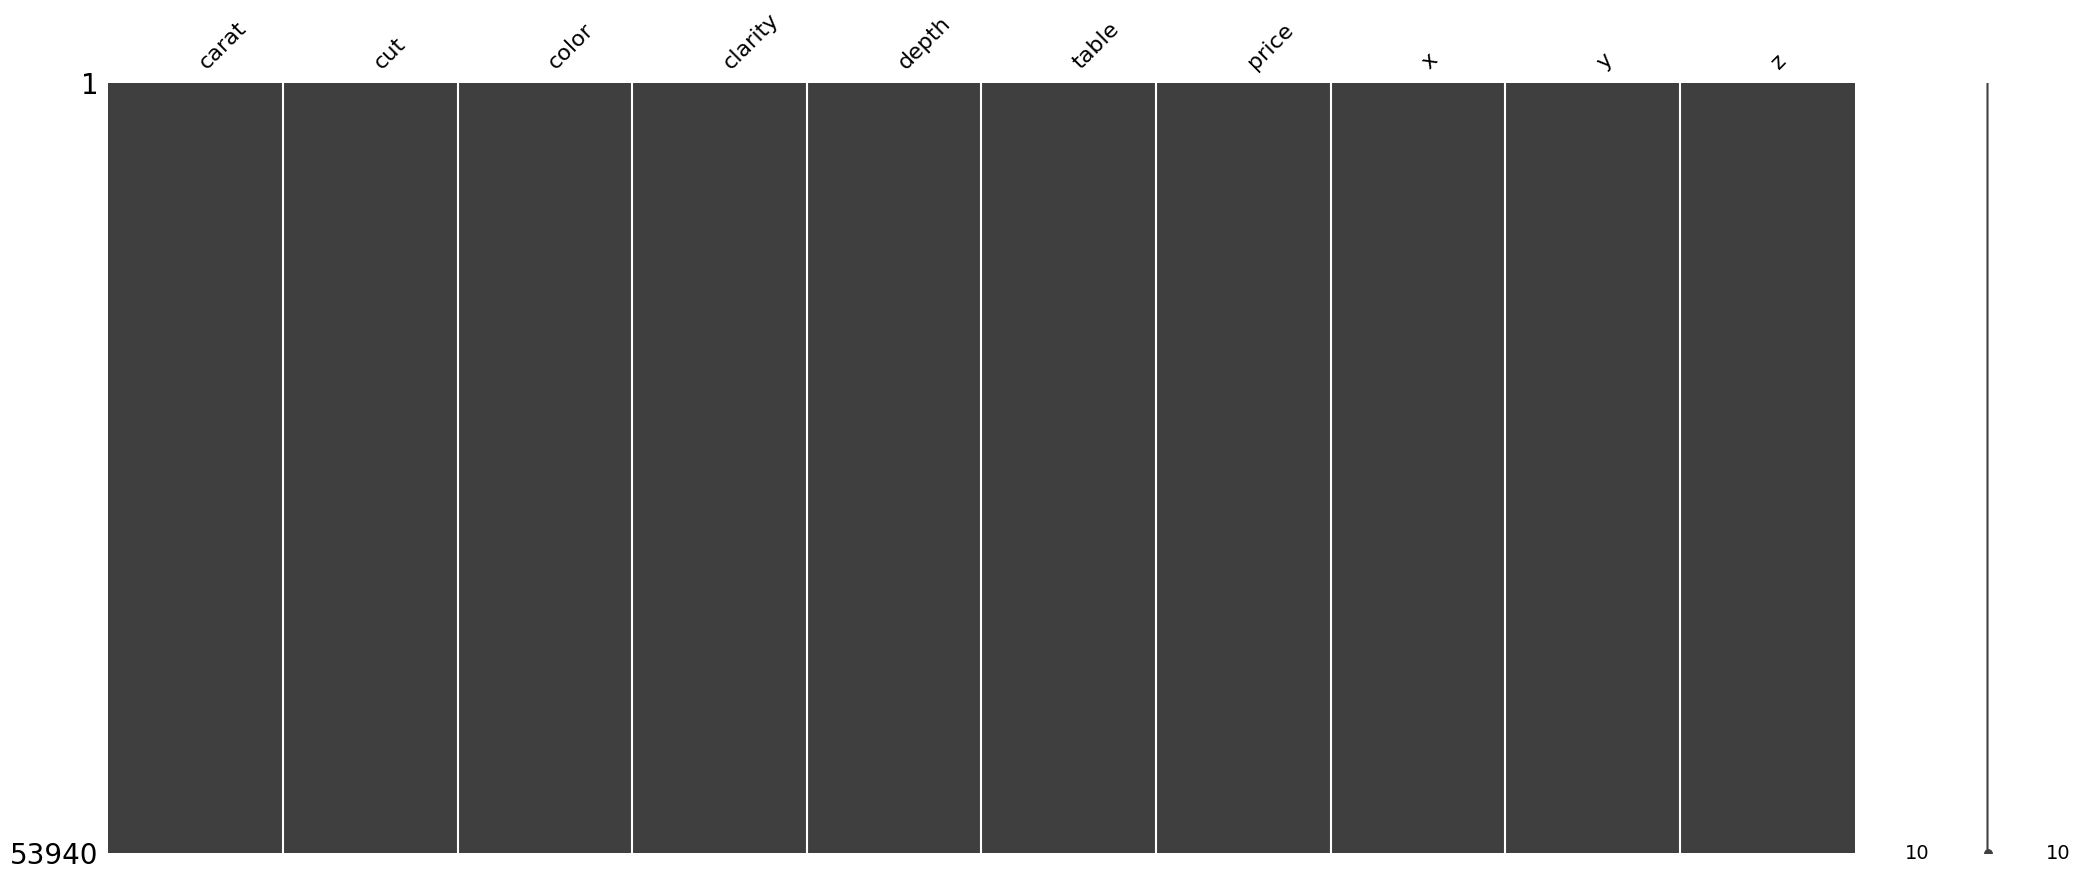

In [7]:
import missingno as mo
mo.matrix(df)

In [8]:
# Check for missing values
print(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


* From the above output, we can see that the null values and the rows which contained 0 value are deleted. Moreover, the dimension of the data has now become 53794 rows with 11 features.

In [9]:
# Drop duplicates, if any
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(53794, 10)

# Unique Values


In [11]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [12]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [13]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [14]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

# EDA Data Visualization

# Bar Plot Of Categorical Column

In [15]:
x = df['cut'].value_counts().reset_index()
x.columns = ['cut', 'count']

y = df['color'].value_counts().reset_index()
y.columns = ['color', 'count']

z = df['clarity'].value_counts().reset_index()
z.columns = ['clarity', 'count']

fig = make_subplots(rows=1, cols=3, subplot_titles=['Cut', 'Color', 'Clarity'])

fig.add_trace(go.Bar(x=x['cut'], y=x['count'], name='Cut'), row=1, col=1)
fig.add_trace(go.Bar(x=y['color'], y=y['count'], name='Color'), row=1, col=2)
fig.add_trace(go.Bar(x=z['clarity'], y=z['count'], name='Clarity'), row=1, col=3)

fig.update_layout(title_text='Subplots of Bar Graphs: Cut, Color, and Clarity',
                  xaxis=dict(title='Categories'),
                  yaxis=dict(title='Count'),
                  showlegend=False)

fig.show()


# Histogram Plot Of Numerical Columns

In [16]:
numerical_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

num_rows = (len(numerical_columns) // 2) + (len(numerical_columns) % 2)
num_cols = 2

fig = sp.make_subplots(rows=num_rows, cols=num_cols,
                       subplot_titles=numerical_columns,
                       vertical_spacing=0.15)
for i, column in enumerate(numerical_columns):
    row = (i // num_cols) + 1
    col = (i % num_cols) + 1
    trace = go.Histogram(x=df[column], nbinsx=20)
    fig.add_trace(trace, row=row, col=col)

fig.update_layout(height=num_rows * 300, width=num_cols * 400,
                  title_text='Histogram Subplots of Numerical Features')
fig.update_yaxes(title_text='Frequency')
fig.update_xaxes(title_text='Value')

fig.show()

# Distribution of Price

In [17]:
histogram_fig = px.histogram(df, x='price', nbins=30,
                             title='Distribution of Price',
                             labels={'price': 'Price', 'count': 'Frequency'})
histogram_fig.show()

In [18]:
x = px.box(df, x='color', y='price',
                 title='Box Plot of Price by Cut',
                 labels={'cut': 'Cut Quality', 'price': 'Price'})
x.show()

**From the above plot, we can see that G, H, I and J type color has less number of outliers compared to D and E.It suggests that the better the quality of color the higher the outliers except for G type color. Also, each category type has the same maximum and minimum price.**

# Box Plot of Price by Cut

In [19]:
box_fig = px.box(df, x='cut', y='price',
                 title='Box Plot of Price by Cut',
                 labels={'cut': 'Cut Quality', 'price': 'Price'})
box_fig.show()

**From the above plot, we can see that the lower the quality of cut, the higher the number of outliers except for the Ideal cut type. Also, each category type has the same maximum and minimum price.**

# Carat vs Price Colored by Cut

In [20]:
scatter_fig = px.scatter(df, x='carat', y='price', color='cut',
                         title='Carat vs Price Colored by Cut',
                         labels={'carat': 'Carat', 'price': 'Price', 'cut': 'Cut Quality'})
scatter_fig.show()

# 3D Scatter Plot of Price

In [21]:
fig = px.scatter_3d(df, x='carat', y='depth', z='price', color='price',
                    title='3D Scatter Plot of Price')
fig.show()


# 3D Scatter plot of Carat, Cut, and Price using Plotly

In [22]:
scatter_3d_fig = px.scatter_3d(df, x='carat', y='cut', z='price', color='cut',
                               title='3D Scatter Plot of Carat, Cut, and Price',
                               labels={'carat': 'Carat', 'cut': 'Cut Quality', 'price': 'Price'})
scatter_3d_fig.show()

# Correlation Matrix

In [23]:
numerical_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

correlation_matrix = df[numerical_columns].corr()

correlation_matrix

In [24]:
# Select only numerical columns
numerical_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Create a subset of the dataset with numerical columns
numerical_data = df[numerical_columns]

# Calculate correlation matrix
corr_matrix = numerical_data.corr()

# Create a heatmap using Plotly with annotations
heatmap_fig = go.Figure(data=go.Heatmap(
                   z=corr_matrix.values,
                   x=corr_matrix.columns,
                   y=corr_matrix.columns,
                   colorscale='Viridis',
                   colorbar=dict(title="Correlation"),
                   zmin=-1, zmax=1))

heatmap_fig.update_layout(title="Correlation Heatmap (Numerical Features)",
                          xaxis=dict(title="Features"),
                          yaxis=dict(title="Features"))
heatmap_fig.show()


**From the above plot, We can see that carat, length, width, depth, and price are having a high correlation with each other.**

**However, the categorical data is not taken into account. Since these categories are considered as essential factors for pricing the diamond, therefore, we will compare each category feature with the price.**

**From the above analysis, we could say that carat,length, width, depth are an essential factor in deciding the price of a diamond. However, other features also play an essential role such as cut, clarity, and color, Length/Width, depth percentage, and table percentage. However, some of the features have a considerable number of outliers.**